# Proyek Analisis Data: [E-commerce-public-dataset]
- **Nama:** Muhammad Syafiq Fadhilah
- **Email:** msyafiqfadhilah333@gmail.com
- **ID Dicoding:** syafiq333

## Menentukan Pertanyaan Bisnis

- Bagaimana cara mengetahui 10 produk dengan penjualan terlaris dengan grafik?
- Buktikan dengan grafik apakah ada pergeseran tren penjualan produk?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd #Python Data Analysis Library
import numpy as np #Python Scientific Library (Umumnya membantu
#dalam urusan list)
import matplotlib.pyplot as plt
import seaborn as sns
#Selective import modul-modul Scikit Learn
#(Scikit Learn memiliki banyak modul machine learning)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os                                                                         #Mengimpor modul os mengakses folder data
import zipfile                                                                    #Mengimpor modul zipfile untuk membaca file zip

local_zip = '/content/drive/MyDrive/Colab Notebooks/Dataset/E-commerce-public-dataset.zip'                                      #Mendefinisikan file zip yang akan diekstrak
zip_ref = zipfile.ZipFile(local_zip, 'r')                                         #Mengekstrak file zip
zip_ref.extractall('/content/')                                                   #Menempatkan file hasil ekstrak zip
zip_ref.close()                                                                   #Menghentikan fungsi zip.ref

## Data Wrangling

### Gathering Data

1. Memuat data customer

In [4]:
customers_df = pd.read_csv("/content/E-Commerce Public Dataset/customers_dataset.csv")
customers_df.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


2. Memuat data geolocation

In [5]:
geolocation_df = pd.read_csv("/content/E-Commerce Public Dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


3. Memuat data order item

In [6]:
order_items_df = pd.read_csv("/content/E-Commerce Public Dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


4. Memuat data order payments

In [7]:
order_payments_df = pd.read_csv("/content/E-Commerce Public Dataset/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


5. Memuat data order review

In [8]:
order_reviews_df = pd.read_csv("/content/E-Commerce Public Dataset/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


6. Memuat data orders

In [9]:
orders_df = pd.read_csv("/content/E-Commerce Public Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


7. Memuat data product category

In [10]:
product_category_name_df = pd.read_csv("/content/E-Commerce Public Dataset/product_category_name_translation.csv")
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
product_category_name_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


8. Memuat data products

In [12]:
products_df = pd.read_csv("/content/E-Commerce Public Dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


9. Memuat data seller

In [13]:
sellers_df = pd.read_csv("/content/E-Commerce Public Dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- setelah melihat satu persatu dari data e-commerce, dapat disimpulkan bahwa sebagian besar datanya masih kotor. masih terdapat missing value, dan duplikasi data.

### Assessing Data

1. Menilai data customer

In [14]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [15]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [16]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


2. Menilai geolocation dataset

In [17]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [18]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [19]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


3. Menilai order items

In [20]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [22]:
datetime_columns = ["shipping_limit_date"]
for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [23]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


4. Menilai orders payment

In [24]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [25]:
order_payments_df.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [26]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


5. Menilai order_reviews

In [27]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Mengecek missing value

In [28]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Mengecek duplikasi data

In [29]:
print("jumlah duplikasi: ", order_reviews_df.duplicated().sum())

jumlah duplikasi:  0


In [30]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


6. Menilai order dataset

In [31]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Mengecek missing value

In [32]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [33]:
print("jumlah duplikasi: ", orders_df.duplicated().sum())

jumlah duplikasi:  0


In [34]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


7. menilai product category

In [35]:
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


mengecek missing value

In [36]:
product_category_name_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [37]:
print("jumlah duplikasi: ", product_category_name_df.duplicated().sum())

jumlah duplikasi:  0


8. mengecek product dataset

In [38]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [39]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [40]:
print("jumlah duplikasi: ", products_df.duplicated().sum())

jumlah duplikasi:  0


In [41]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


9. Mengecek data sellers

In [42]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


mengecek missing value

In [43]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [44]:
print("jumlah duplikasi: ", sellers_df.duplicated().sum())

jumlah duplikasi:  0


In [45]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
Setelah dilakukan assessing data, ternyata terdapat beberapa kesalahan, missing value, duplikasi data pada data diatas. antara lain.
- geolocation
terdapat duplikasi data

- order reviews
terdapat missing value pada review comment title dan review comment message
- order dataset
terdapat missing value pada order approved at, order delivered carier date, order delivered customer date
- product dataset
terdapat missing value dari product category name sampai product width cm


### Cleaning Data

- Menangani duplikasi data



In [46]:
geolocation_df.drop_duplicates(inplace=True)

In [47]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


In [48]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


- Menangani missing value

In [49]:
order_reviews_df[order_reviews_df['review_comment_title'].isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [50]:
order_reviews_df.review_comment_title.value_counts()

,count
review_comment_title,
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
Excelente,248
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [51]:
order_reviews_df.fillna(value='No Title', inplace=True)

In [52]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


In [53]:
products_df[products_df['product_category_name'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [54]:
products_df.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [55]:
products_df.fillna(value='No Category', inplace=True)

<ipython-input-55-59f1925818af>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No Category' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  products_df.fillna(value='No Category', inplace=True)


In [56]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [57]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [58]:
order_reviews_df.review_comment_message.value_counts()

,count
review_comment_message,
No Title,58247
Muito bom,230
Bom,189
muito bom,122
bom,107
...,...
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1
"entrega na data prevista,somente a qualidade do material não é o mesmo que eu pensava mas pelo preço ta valido",1


In [59]:
order_reviews_df.fillna(value='No Message', inplace=True)

In [60]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


**Insight:**

setelah melakukan proses cleaning data, data yang semula terdapat missing value, duplicate sudah tertangani

## Exploratory Data Analysis (EDA)

### Explore ...

1. eksplorasi customers_dataset

In [61]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [62]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


2. geolocation dataset

In [63]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [64]:
geolocation_df.groupby(by="geolocation_city").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)
geolocation_df.groupby(by="geolocation_state").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

,geolocation_zip_code_prefix
geolocation_state,
SP,6349
MG,1868
RJ,1390
RS,1132
PR,1046
BA,992
GO,773
SC,620
PE,596


3. Order Items dataset

In [65]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [66]:
order_items_df.groupby(by="product_id").agg(
    {
        "order_item_id": "count",
        "price": ["min", "max", "mean", "std"]
    }
)

order_item_id   price                  \
                                         count     min     max    mean   
product_id                                                               
00066f42aeeb9f3007548bb9d3f33c38             1  101.65  101.65  101.65   
00088930e925c41fd95ebfe695fd2655             1  129.90  129.90  129.90   
0009406fd7479715e4bef61dd91f2462             1  229.00  229.00  229.00   
000b8f95fcb9e0096488278317764d19             2   58.90   58.90   58.90   
000d9be29b5207b54e86aa1b1ac54872             1  199.00  199.00  199.00   
...                                        ...     ...     ...     ...   
fff6177642830a9a94a0f2cba5e476d1             2  109.99  119.99  114.99   
fff81cc3158d2725c0655ab9ba0f712c             1   90.00   90.00   90.00   
fff9553ac224cec9d15d49f5a263411f             1   32.00   32.00   32.00   
fffdb2d0ec8d6a61f0a0a0db3f25b441             5   29.99   34.99   33.99   
fffe9eeff12fcbd74a2f2b007dde0c58             1  249.99  249.99  249.99   

                                            
                                       std  
product_id                                  
00066f42aeeb9f3007548bb9d3f33c38       NaN  
00088930e925c41fd95ebfe695fd2655       NaN  
0009406fd7479715e4bef61dd91f2462       NaN  
000b8f95fcb9e0096488278317764d19  0.000000  
000d9be29b5207b54e86aa1b1ac54872       NaN  
...                                    ...  
fff6177642830a9a94a0f2cba5e476d1  7.071068  
fff81cc3158d2725c0655ab9ba0f712c       NaN  
fff9553ac224cec9d15d49f5a263411f       NaN  
fffdb2d0ec8d6a61f0a0a0db3f25b441  2.236068  
fffe9eeff12fcbd74a2f2b007dde0c58       NaN  

[32951 rows x 5 columns]

In [67]:
shipping_limit_date_df = order_items_df["shipping_limit_date"]-order_items_df["shipping_limit_date"]
shipping_limit_date_df = shipping_limit_date_df.apply(lambda x: x.total_seconds())
orders_df["shipping_limit_date_df"] = round(shipping_limit_date_df/86400)

4. Order payments dataset

In [68]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


5. order review dataset

In [69]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No Title,No Title,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,87656,58247,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


## Visualization & Explanatory Analysis

### Pertanyaan 1: Mengetahui Visualisasi Produk terlaris

<ipython-input-81-3ca35bb31b81>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette='viridis')


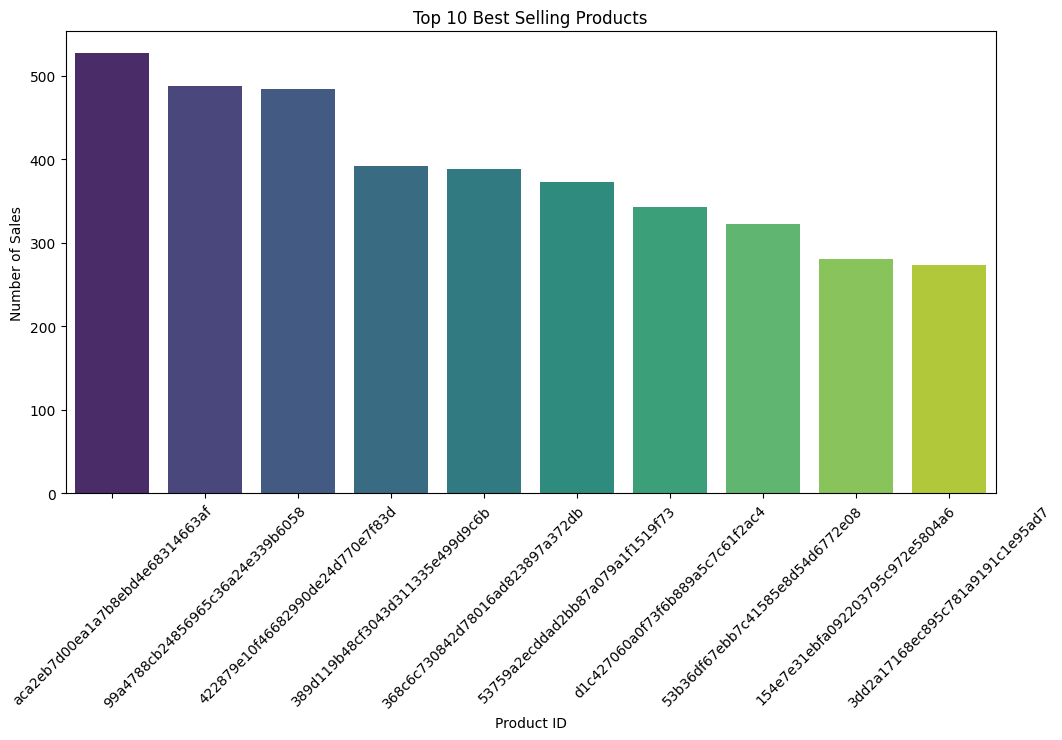

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in CSV files named 'orders.csv' and 'order_items.csv'
# Replace with your actual file names if different
orders_data = pd.read_csv('/content/E-Commerce Public Dataset/orders_dataset.csv')  # Load orders data
order_items_data = pd.read_csv('/content/E-Commerce Public Dataset/order_items_dataset.csv')  # Load order items data

# Menggabungkan dataset
merged_data = pd.merge(orders_data, order_items_data, on='order_id', how='inner')

# Menghitung jumlah penjualan per produk
product_sales = merged_data['product_id'].value_counts().head(10)

# Visualisasi produk terlaris
plt.figure(figsize=(12, 6))
sns.barplot(x=product_sales.index, y=product_sales.values, palette='viridis')
plt.title('Top 10 Best Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2: tren penjualan berdasarkan waktu

<ipython-input-82-18e9af144671>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = merged_data.set_index('order_purchase_timestamp').resample('M').size()


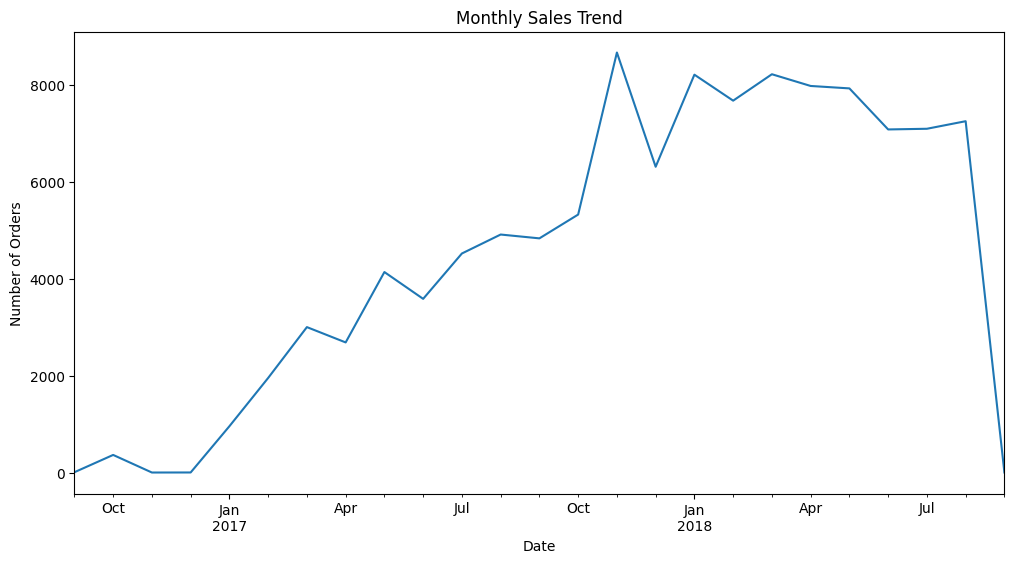

In [82]:
# Memuat ulang data dengan kolom tanggal
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

# Menghitung jumlah pesanan per bulan
monthly_sales = merged_data.set_index('order_purchase_timestamp').resample('M').size()

# Visualisasi tren penjualan bulanan
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()


**Insight:**
- pada permasalahan pertama, menunjukkan bahwa dari grafik bahwa ada 10 produk dengan penjualan terlaris
- pada permasalahan kedua, menunjukkan bahwa adanya pergeseran tren penjualan produk yang sangat signifikan

## Analisis Lanjutan (Opsional)

In [83]:
import pandas as pd

# Memuat dataset
orders_file_path = '/content/E-Commerce Public Dataset/orders_dataset.csv'  # Ganti dengan path file Anda
order_items_file_path = '/content/E-Commerce Public Dataset/order_items_dataset.csv'  # Ganti dengan path file Anda

orders_data = pd.read_csv(orders_file_path)
order_items_data = pd.read_csv(order_items_file_path)
orders_data.head()
order_items_data.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [85]:
# Menggabungkan dataset
merged_data = pd.merge(orders_data, order_items_data, on='order_id', how='inner')
merged_data.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [86]:
# Mengubah kolom timestamp menjadi tipe datetime
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

# Menentukan tanggal referensi untuk perhitungan recency
reference_date = merged_data['order_purchase_timestamp'].max() + pd.DateOffset(1)

# Menghitung Recency, Frequency, dan Monetary
rfm_table = merged_data.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'price': 'sum'  # Monetary (Ganti 'price' dengan nama kolom yang sesuai untuk total pengeluaran)
}).reset_index()

# Mengganti nama kolom
rfm_table.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'price': 'Monetary'
}, inplace=True)

rfm_table.head()

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,293,1,89.80
1,000161a058600d5901f007fab4c27140,414,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,552,1,179.99
3,0002414f95344307404f0ace7a26f1d5,383,1,149.90
4,000379cdec625522490c315e70c7a9fb,154,1,93.00


In [87]:
# Memberikan skor untuk setiap metrik
rfm_table['R_Score'] = pd.qcut(rfm_table['Recency'], 4, ['4', '3', '2', '1'])
rfm_table['F_Score'] = pd.qcut(rfm_table['Frequency'].rank(method='first'), 4, ['1', '2', '3', '4'])
rfm_table['M_Score'] = pd.qcut(rfm_table['Monetary'], 4, ['1', '2', '3', '4'])

# Menggabungkan skor menjadi satu skor RFM
rfm_table['RFM_Score'] = rfm_table['R_Score'].astype(str) + rfm_table['F_Score'].astype(str) + rfm_table['M_Score'].astype(str)

rfm_table.head()


,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,00012a2ce6f8dcda20d059ce98491703,293,1,89.80,2,1,3,213
1,000161a058600d5901f007fab4c27140,414,1,54.90,1,1,2,112
2,0001fd6190edaaf884bcaf3d49edf079,552,1,179.99,1,1,4,114
3,0002414f95344307404f0ace7a26f1d5,383,1,149.90,1,1,3,113
4,000379cdec625522490c315e70c7a9fb,154,1,93.00,3,1,3,313


In [88]:
# Definisi segmentasi berdasarkan skor RFM
def rfm_segment(df):
    if df['RFM_Score'] in ['444', '443', '434', '433']:
        return 'Best Customers'
    elif df['RFM_Score'] in ['344', '334', '343', '333']:
        return 'Loyal Customers'
    elif df['RFM_Score'] in ['244', '234', '243', '233']:
        return 'Potential Loyalists'
    elif df['RFM_Score'] in ['144', '134', '143', '133']:
        return 'Recent Customers'
    elif df['RFM_Score'] in ['444', '433', '422', '412']:
        return 'Promising'
    elif df['RFM_Score'] in ['244', '234', '223', '213']:
        return 'Customers Needing Attention'
    elif df['RFM_Score'] in ['144', '134', '123', '113']:
        return 'About To Sleep'
    elif df['RFM_Score'] in ['122', '112', '111', '121']:
        return 'At Risk'
    elif df['RFM_Score'] in ['322', '312', '211', '221']:
        return 'Cannot Lose Them'
    else:
        return 'Other'

# Menambahkan kolom segmentasi
rfm_table['Segment'] = rfm_table.apply(rfm_segment, axis=1)
rfm_table.head()

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,00012a2ce6f8dcda20d059ce98491703,293,1,89.80,2,1,3,213,Customers Needing Attention
1,000161a058600d5901f007fab4c27140,414,1,54.90,1,1,2,112,At Risk
2,0001fd6190edaaf884bcaf3d49edf079,552,1,179.99,1,1,4,114,Other
3,0002414f95344307404f0ace7a26f1d5,383,1,149.90,1,1,3,113,About To Sleep
4,000379cdec625522490c315e70c7a9fb,154,1,93.00,3,1,3,313,Other


## Conclusion

Kesimpulan dari proses analisis data E-commerce public dataset:
- Data tersebut masih kotor dan terdapat beberapa missing value dan duplikasi data
- Setelah itu, data diolah melalui beberapa tahap, yaitu data dicek satu persatu melalui assessing data dan dibersihkan melalui cleaning data.
- Setelah data dirasa sudah bersih, tahap selanjutnya adalah dengan eksplorasi secara mendetail datanya seperti apa. yaitu dengan cara menggabungkan dua dataset menjadi satu.
- Tahap selanjutnya adalah menjawab pertanyaan bisnis, yaitu Bagaimana cara mengetahui 10 produk dengan penjualan terlaris dengan grafik? dan buktikan dengan grafik apakah ada pergeseran tren penjualan produk?
- Hasilnya dapat dilihat pada tabel, ada Top 10 penjualan produk terlaris ditunjukkan dengan product id dan tren penjualan berdasarkan waktu dari awalnya turun lama kelamaan menjadi naik dan akhirnya turun drastis.


Menyimpan semua file ke dalam 1 csv

In [90]:
import pandas as pd
import os

# Path ke folder tempat file CSV diekstrak
dataset_path = '/content/E-Commerce Public Dataset'

# List nama file CSV yang telah dibersihkan
file_names = ['customers_dataset.csv', 'geolocation_dataset.csv',
              'order_items_dataset.csv', 'order_reviews_dataset.csv',
              'orders_dataset.csv', 'product_category_name_translation.csv',
              'products_dataset.csv', 'sellers_dataset.csv']

# List untuk menyimpan DataFrame
dfs = []

# Loop untuk membaca setiap file CSV dan menambahkannya ke list dfs
for file_name in file_names:
    # Gabungkan path folder dan nama file
    full_path = os.path.join(dataset_path, file_name)
    df = pd.read_csv(full_path)
    dfs.append(df)

# Gabungkan semua DataFrame dalam list dfs
all_df = pd.concat(dfs, ignore_index=True)

# Simpan DataFrame yang telah digabungkan ke dalam satu file CSV
all_df.to_csv('all_datarev.csv', index=False)